In [29]:
import numpy as np
import pandas as pd
import cv2
import os
from tqdm import tqdm
import matplotlib.pyplot as plt
import random
import math
from IPython import display
from collections import Counter
import tensorflow as tf
from sklearn.model_selection import KFold

print("loaded")

loaded


In [30]:
train_dir = "/kaggle/input/cvpr-mid/test"
categories = []
for c in os.listdir(train_dir):
    categories.append(c)
print(categories)

['airplane', 'horse', 'truck', 'automobile', 'ship', 'dog', 'bird', 'frog', 'cat', 'deer']


100%|██████████| 1000/1000 [00:00<00:00, 1184.53it/s]


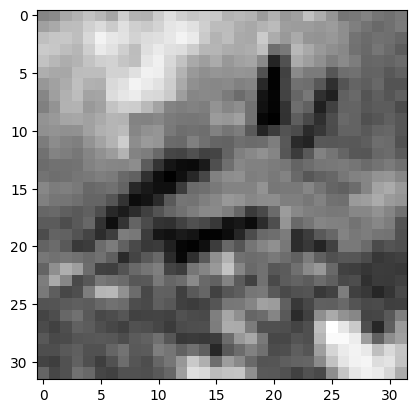

In [31]:
train_data = []

for label in categories:
    path = os.path.join(train_dir, label)
    images = os.listdir(path)
    Index = categories.index(label)

    for img in tqdm(images):
        train_data.append([Index, cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)])

plt.imshow(train_data[100][1], cmap="gray")

In [32]:
random.shuffle(train_data)

k = 20

def manhattan_distance(x,y):
    return np.sum(np.abs(x-y))

def euclidean_distance(x,y):
    return np.sqrt(np.sum((x-y)**2))


In [33]:

manhattan_per = []
euclidian_per = []

a=0
b=2000
while(b<10001):
    fold_array = train_data[a:b]
    train_array=train_data[:a]+train_data[b:]
    fold_total_img = 2000
    fold_correct_img_manhattan = [0]*k
    fold_correct_img_euclidean = [0]*k

    for fold_unit in tqdm(fold_array, desc="Processing folds-------"):
        fold_class, fold_img = fold_unit
        fold_manhattan_unit_list=[]
        fold_euclidean_unit_list=[]

    for train_unit in train_array:
        train_class, train_img = train_unit
        fold_manhattan_unit_list.append([train_class, manhattan_distance(fold_img, train_img)])
        fold_euclidean_unit_list.append([train_class, euclidean_distance(fold_img, train_img)])
    fold_manhattan_unit_list.sort(key=lambda r: r[1])
    fold_euclidean_unit_list.sort(key=lambda r: r[1])
    fold_manhattan = [i[0] for i in fold_manhattan_unit_list[:k]]
    fold_euclidean = [i[0] for i in fold_euclidean_unit_list[:k]]
    high_man=[]
    high_ecd=[]

    while fold_manhattan:
        counter = Counter(fold_manhattan)
        most_common_number, most_common_count = counter.most_common(1)[0]
        high_man.insert(0, most_common_number)
        fold_manhattan.pop()
    while fold_euclidean:
        counter = Counter(fold_euclidean)
        most_common_number, most_common_count = counter.most_common(1)[0]
        high_ecd.insert(0, most_common_number)
        fold_euclidean.pop()

    for i in range(20):
        if(high_man[i]==fold_class):
            fold_correct_img_manhattan[i]+=1
        if(high_ecd[i]==fold_class):
            fold_correct_img_euclidean[i]+=1
    fold_correct_img_manhattan = [(j/fold_total_img)*100 for j in fold_correct_img_manhattan]
    fold_correct_img_euclidean = [(j/fold_total_img)*100 for j in fold_correct_img_euclidean]
    manhattan_per.append(fold_correct_img_manhattan)
    euclidian_per.append(fold_correct_img_euclidean)
    a+=2000
    b+=2000


Processing folds-------: 100%|██████████| 2000/2000 [00:00<00:00, 327015.75it/s]


In [34]:
manhattan_fold_acc = []
euclidian_fold_acc = []
for i in range(20):
    extracted_man = [sublist[i] for sublist in manhattan_per]
    extracted_ecd = [sublist[i] for sublist in euclidian_per]
    manhattan_fold_acc.append(extracted_man)
    euclidian_fold_acc.append(extracted_ecd)

In [35]:
mean_manhattan = [np.mean(i) for i in manhattan_fold_acc]
mean_euclidian = [np.mean(i) for i in euclidian_fold_acc]

std_manhattan = [np.std(i) for i in manhattan_fold_acc]
std_euclidian = [np.std(i) for i in euclidian_fold_acc]

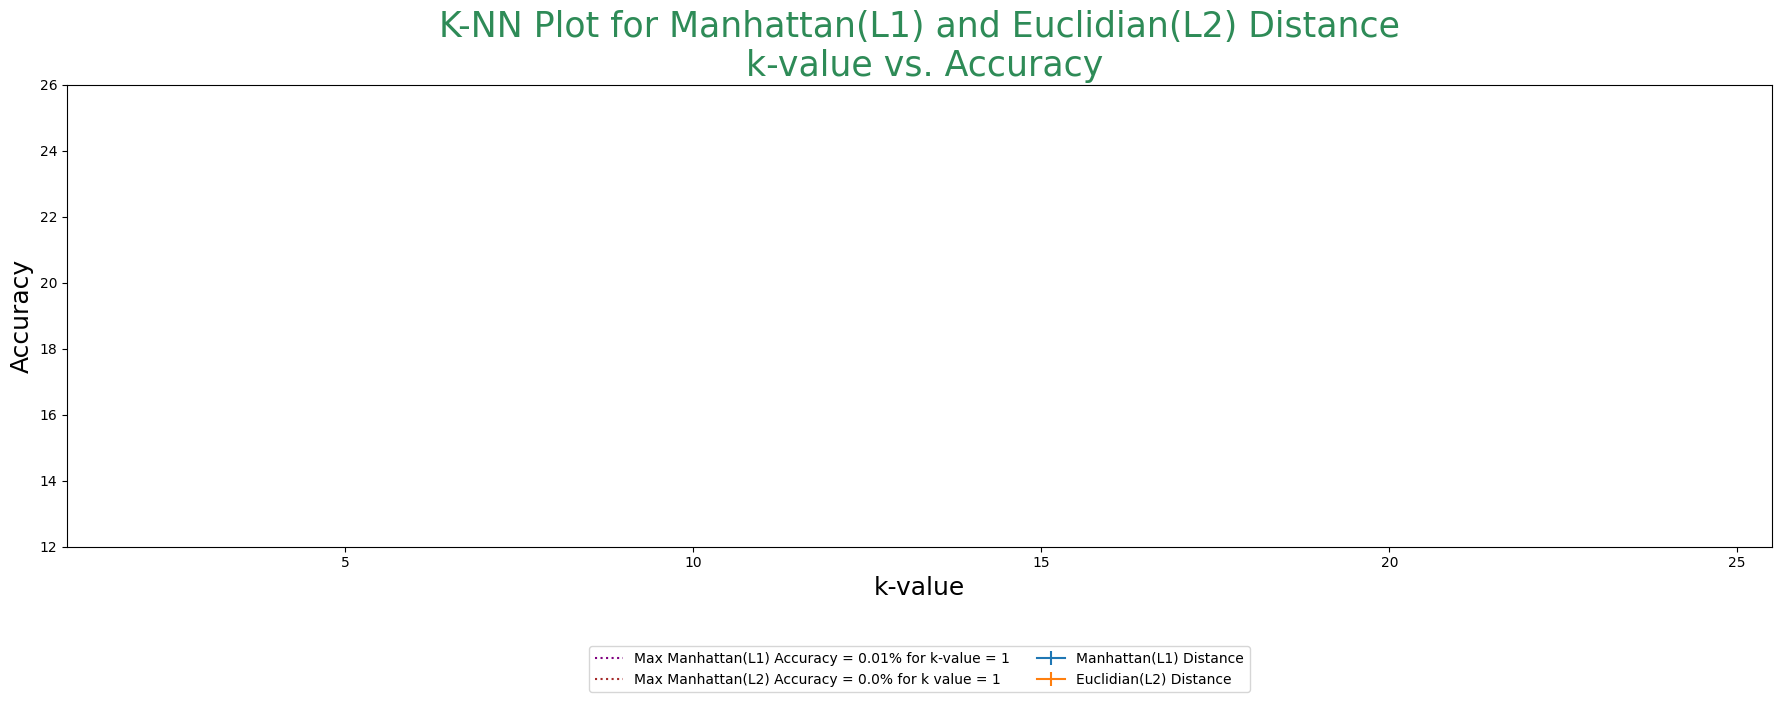

In [36]:
k=20
plt.figure(figsize=(22, 6))
plt.errorbar(range(1, k+1), mean_manhattan, yerr=std_euclidian, label="Manhattan(L1) Distance")
plt.errorbar(range(1, k+1), mean_euclidian, yerr=std_euclidian, label="Euclidian(L2) Distance")
plt.scatter(range(1, k+1), mean_manhattan, color="red", marker="o")
plt.scatter(range(1, k+1), mean_euclidian, color="blue", marker="o")
plt.xlabel("k-value", size=18)
plt.ylabel("Accuracy", size=18)
plt.title("K-NN Plot for Manhattan(L1) and Euclidian(L2) Distance\n k-value vs. Accuracy", size=25, color="seagreen")
plt.xlim(1, 25.5)
plt.ylim(12, 26)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2), ncol=2)
max_acc_man = np.argmax(mean_manhattan)
max_acc_ecd = np.argmax(mean_euclidian)
plt.axhline(y=mean_manhattan[max_acc_man], linestyle='dotted', color='purple', label=f'Max Manhattan(L1) Accuracy = {round(mean_manhattan[max_acc_man],2)}% for k-value = {max_acc_man+1}')
plt.axhline(y=mean_euclidian[max_acc_ecd], linestyle='dotted', color='brown', label=f'Max Manhattan(L2) Accuracy = {round(mean_euclidian[max_acc_ecd],2)}% for k value = {max_acc_ecd+1}')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2), ncol=2)

plt.show()

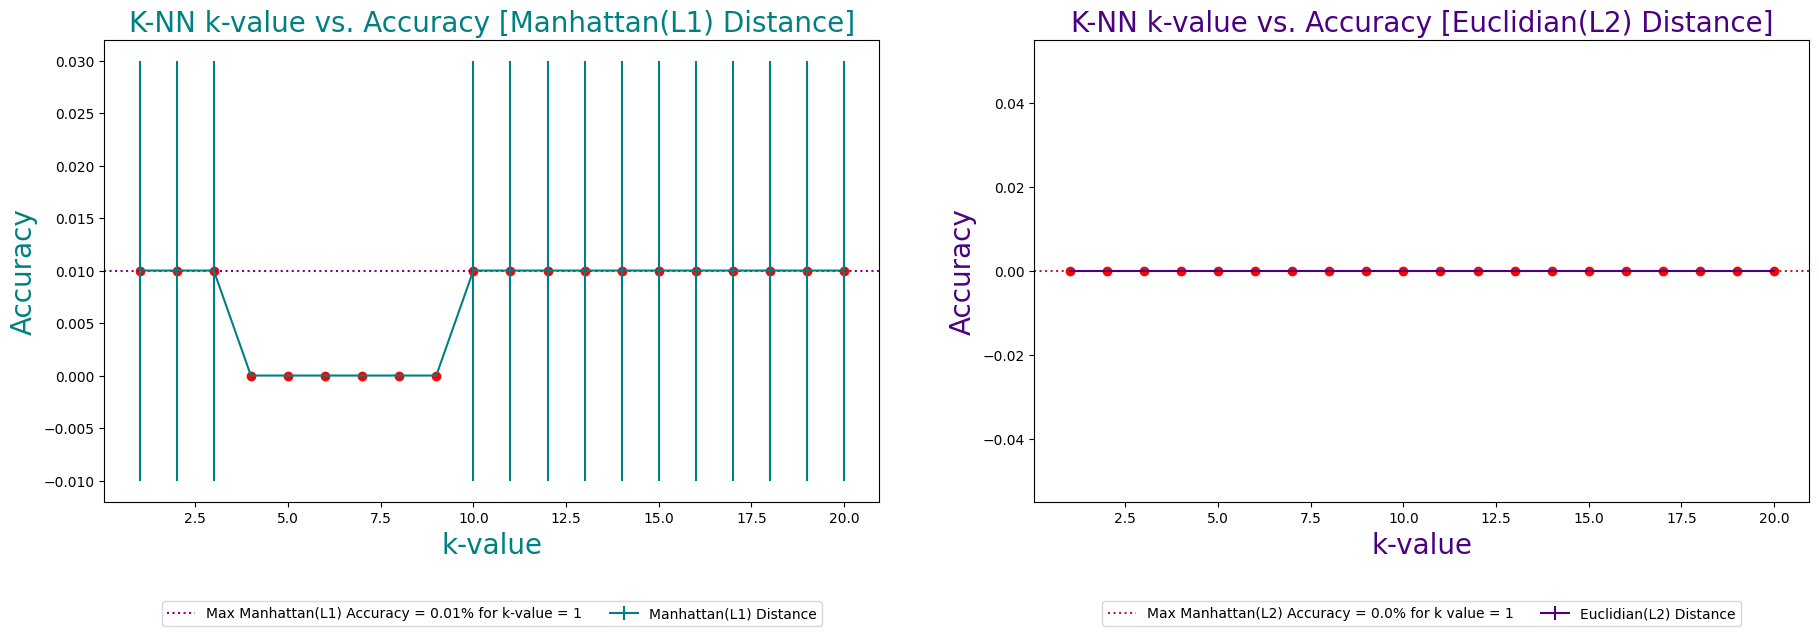

In [37]:
fig, (p1, p2) = plt.subplots(1, 2, figsize=(22, 6))
p1.errorbar(range(1, k+1), mean_manhattan, yerr=std_manhattan, label="Manhattan(L1) Distance", color="teal")
p1.scatter(range(1, k+1), mean_manhattan, color="red", marker="o")
p1.set_xlabel("k-value", size=20, color="teal")
p1.set_ylabel("Accuracy", size=20, color="teal")
p1.set_title("K-NN k-value vs. Accuracy [Manhattan(L1) Distance]", size=20, color="teal")
p1.axhline(y=mean_manhattan[max_acc_man], linestyle='dotted', color='purple', label=f'Max Manhattan(L1) Accuracy = {round(mean_manhattan[max_acc_man],2)}% for k-value = {max_acc_man+1}')
p1.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2), ncol=2)
p2.errorbar(range(1, k+1), mean_euclidian, yerr=std_euclidian, label="Euclidian(L2) Distance", color="indigo")
p2.scatter(range(1, k+1), mean_euclidian, color="red", marker="o")
p2.set_xlabel("k-value", size=20, color="indigo")
p2.set_ylabel("Accuracy", size=20, color="indigo")
p2.set_title("K-NN k-value vs. Accuracy [Euclidian(L2) Distance]", size=20, color="indigo")
p2.axhline(y=mean_euclidian[max_acc_ecd], linestyle='dotted', color='brown', label=f'Max Manhattan(L2) Accuracy = {round(mean_euclidian[max_acc_ecd],2)}% for k value = {max_acc_ecd+1}')
p2.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2), ncol=2)

plt.show()